## Task 1

For fixed correlation coefficient ρ generate 100 pairs of samples x1, . . . , xn ∼
N (a1, σ2
1
) and y1, . . . , ym ∼ N (a2, σ2
2
). For each pair apply t-test for
independent samples and compute t-statistic and αI . Show how the density
plot of t and αI changes when ρ ∈ {−1, −0.5, 0, 0.5, 1}.
Hint: to generate dependent normal samples you can use the method
described here: click link

In [1]:
import numpy as np
from statistics import mean
from scipy import stats
import matplotlib.pyplot as plt
import math

In [96]:
def generate_pair(corr, n = 100, mu1 = 1, sigma1 = 1, mu2 = 1, sigma2 = 1):
    X1 = np.random.normal(0, 1, n)
    X2 = np.random.normal(0, 1, n)
    X3 = np.add([corr * i for i in X1], [np.sqrt(1 - corr**2) * j for j in X2])
    Y1 = [(mu1 + sigma1 * i) for i in X1]
    Y2 = [(mu2 + sigma2 * i) for i in X3]
    return [Y1, Y2]

def generate_samples(corr):
    pairs = []
    for i in range(100):
        pairs.append(generate_pair(corr))
    return pairs

In [97]:
def t_test_independant(pair):
    return (np.mean(pair[0]) - np.mean(pair[1])) / np.sqrt(np.var(pair[0])**2 / len(pair[0]) + np.var(pair[1])**2 / len(pair[1]))

samples = generate_samples(0.5)
t_test_independant(samples[99])

1.0623893301757898

In [98]:
def t_stats_array(corr):
    t_stats = []
    samples = generate_samples(corr)
    for pair in samples:
        t_stats.append(t_test_independant(pair))
    return t_stats

t_stats_array(-0.5)

[1.6786333181942907,
 -0.8432113346929264,
 0.47650650435985886,
 2.0118963470620597,
 -0.991075025575979,
 -1.185741823846657,
 0.7881409787490435,
 -3.115710789488695,
 0.05429818439482933,
 -0.661230572761815,
 0.3866106134685177,
 0.555942975956747,
 -2.1352187831012013,
 0.5687862186109006,
 1.9603748603560962,
 0.46883835237889576,
 2.3995580032080417,
 -1.3777970053973279,
 -0.4572801908719763,
 -0.20111679866801777,
 0.883533556487358,
 -0.02963512826844131,
 -0.5520079095580835,
 -0.3736532991485871,
 0.22693275033092541,
 -0.6955399116219513,
 -5.899392014973222,
 -0.4708804354133104,
 0.9440702539628271,
 -0.6278972873995292,
 -2.377456083723552,
 -0.6293359202931912,
 0.49961129420354294,
 -0.3716895332087384,
 -0.2800799736521098,
 -0.6496251071495367,
 0.443266713076881,
 1.1398191335445647,
 -1.086257038738171,
 -0.038065467328520904,
 -0.24519979088985575,
 -1.468848760816636,
 0.11686205422366039,
 -3.3457888259645037,
 -0.5600031376229697,
 1.27803265877931,
 -1.20122

In [99]:
def data_for_plots(quantile = stats.norm.ppf(0.95)):
    mean_t = []
    a1 = []
    p = [-1, -0.5, 0, 0.5, 1]
    for corr in p:
        tstats = t_stats_array(corr)
        mean_t.append(np.mean(tstats))
        a1.append(sum([1 for x in tstats if np.absolute(x) > quantile]) / len(tstats))
    return mean_t, a1, p

data_for_plots()

([-0.31824700265074873,
  -0.14362050435684046,
  -0.13730762388113207,
  -0.0023172405397898967,
  0.0],
 [0.25, 0.27, 0.15, 0.01, 0.0],
 [-1, -0.5, 0, 0.5, 1])

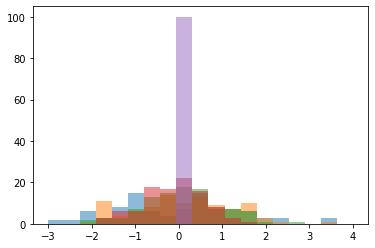

In [100]:
t_stats = t_stats_array(-1)

bins = np.linspace(math.ceil(min(t_stats)), 
                   math.floor(max(t_stats)),
                   20) # fixed number of bins

plt.hist(t_stats, bins=bins, alpha=0.5)

t_stats = t_stats_array(-0.5)
plt.hist(t_stats, bins=bins, alpha=0.5)
t_stats = t_stats_array(0)
plt.hist(t_stats, bins=bins, alpha=0.5)
t_stats = t_stats_array(0.5)
plt.hist(t_stats, bins=bins, alpha=0.5)
t_stats = t_stats_array(1)
plt.hist(t_stats, bins=bins, alpha=0.5)
plt.show()

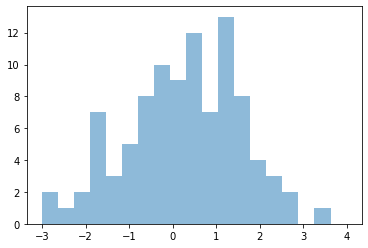

In [101]:
t_stats = t_stats_array(-1)

plt.hist(t_stats, bins=bins, alpha=0.5)
plt.show()

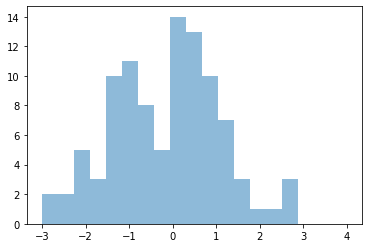

In [102]:
t_stats = t_stats_array(-0.5)
plt.hist(t_stats, bins=bins, alpha=0.5)
plt.show()

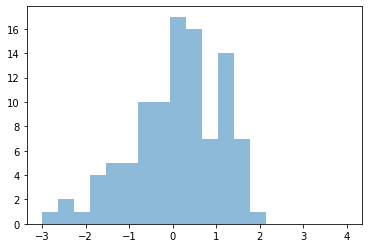

In [103]:
t_stats = t_stats_array(0)
plt.hist(t_stats, bins=bins, alpha=0.5)
plt.show()

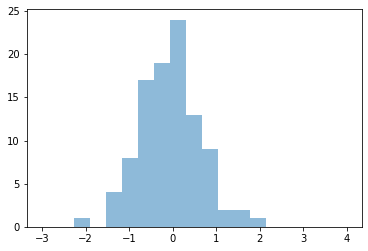

In [104]:
t_stats = t_stats_array(0.5)
plt.hist(t_stats, bins=bins, alpha=0.5)
plt.show()

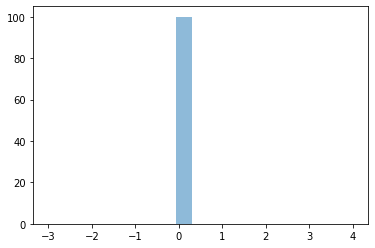

In [105]:
t_stats = t_stats_array(1)
plt.hist(t_stats, bins=bins, alpha=0.5)
plt.show()

Further are just mean values of T

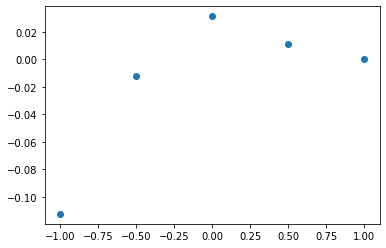

In [106]:
t_stats, a1, p = data_for_plots()

plt.scatter(p, t_stats)

Below is a plot of 1st type error

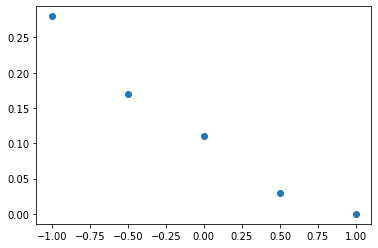

In [107]:
plt.scatter(p, a1)

## Task 2

### Part 1

When KS test for a simple hypothesis is applied for the complex one
(when we estimate the parameters of the distribution θ and test the
hypothesis H0 : sample is from P(θ). Show, that in such situation
the criterion becomes conservative


In [14]:
def generate_sample(a = 0, s = 1, n = 100):
    return np.random.normal(0, 1, n)

generate_sample(0, 1, 10)

array([ 0.87753115, -0.12397541, -0.31087181, -0.00861828,  0.33968114,
       -0.83396161, -2.07324767, -0.09908141, -1.12202266, -0.87043572])

In [15]:
def generate_samples(n = 100):
    return [generate_sample() for i in range(n)]

generate_samples(1)

[array([-0.56411242, -1.44968351, -0.18492686,  0.39767941,  0.14883618,
         0.31069836,  0.23570837,  0.68961737,  0.37203743, -0.42573664,
         1.10136705, -0.45509967,  0.5187322 , -1.41337869, -0.76005951,
         0.52471595,  1.10861062,  0.71960403, -1.0729406 , -1.21221969,
        -0.45214461,  1.220457  ,  0.43004724,  2.30138888,  1.45734517,
         1.54897284, -0.66301804, -0.60303967, -0.01121668, -1.83652413,
        -1.34738031, -0.97000907, -0.12334498,  0.21046681,  1.38313931,
         0.32457194,  0.67222743,  0.72070186, -1.23009392,  0.01468634,
        -0.53351475,  1.1183115 , -0.11876548,  1.13905022,  0.73492158,
         0.10364727,  1.72645417,  0.87665988,  1.01390739,  1.63636015,
        -1.39252308,  0.22783842, -0.23513387, -1.2503651 ,  0.80895843,
        -0.4482663 ,  1.08923511, -0.61785756, -0.63068052, -2.21882605,
        -0.28992409, -0.99792785,  0.09201349, -1.17124022,  0.15147818,
        -0.09263378, -0.20427734, -0.74453227,  0.8

In [16]:
a = 0
s = 1

def norm_cdf(x):
    return stats.norm.cdf(x, loc=a, scale=s)

norm_cdf(0.5)

0.6914624612740131

In [17]:
def ks_test(sample):
    return stats.kstest(sample, norm_cdf)

ks_test(generate_sample(0, 12))

KstestResult(statistic=0.09713836937873455, pvalue=0.28325575533398906)

In [18]:
rng = np.random.default_rng()

ks_test(stats.uniform.rvs(size=100))

KstestResult(statistic=0.5053170530236433, pvalue=3.573556955297327e-24)

In [19]:
def a1_error_for_plots(step = 0.05, start = 0, end = 1):
    a1 = []
    a_lvls = np.arange(start, end + step, step)
    for a_lvl in a_lvls:
        has_error = 0
        samples = generate_samples()
        for sample in samples:
            a = np.mean(sample)
            s = np.var(sample)
            if (ks_test(sample)[0] > stats.kstwobign.pdf(1 - a_lvl/2, a, s) or ks_test(sample)[0] < stats.kstwobign.pdf(a_lvl/2, a, s)):
                has_error += 1
        a1.append(has_error / len(samples))
    return a_lvls, a1

# a1_error_for_plots()

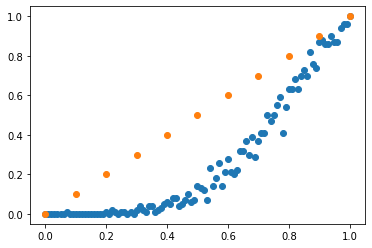

In [20]:
plt_ks_a1_err = a1_error_for_plots(0.01)

line = np.arange(0, 1 + 0.1, 0.1)

plt.scatter(plt_ks_a1_err[0], plt_ks_a1_err[1])
plt.scatter(line, line)

### Part 2

When χ
2 Pearson test is used to test the hypothesis for the continuous
distribution. Show how it depends on the discretization.

In [21]:
def chi_squared(O_k, n, p_k):
    return (O_k - n * p_k)**2 / (n * p_k)

chi_squared(3, 10, 0.3)

0.0

In [22]:
def chi_squared_statistics(observations, left_border, right_border):
    O_k = 0
    n = len(observations)
    p_k = 0
    if (left_border == "-inf"):
        O_k = len(list(filter(lambda score: score <= right_border, observations)))
        p_k = stats.norm.cdf(right_border)
    elif (right_border == "inf"):
        O_k = len(list(filter(lambda score: score >= left_border, observations)))
        p_k = 1 - stats.norm.cdf(left_border)
    else:
        O_k = len(list(filter(lambda score: left_border <= score <= right_border, observations)))
        p_k = stats.norm.cdf(right_border) - stats.norm.cdf(left_border)
    return chi_squared(O_k, n, p_k)

chi_squared_statistics([2, 5, 0, 4], '-inf', 0)

0.5

In [23]:
def chi_squared_borders(sample, borders):
    res = 0
    if (borders == ["-inf", "inf"]):
        return 0
    for i in range(len(borders) - 1):
        left_border = borders[i]
        right_border = borders[i + 1]
        res += chi_squared_statistics(sample, left_border, right_border)
    return res

chi_squared_borders(generate_sample(), ['-inf', 0, 'inf'])

0.36

In [24]:
def chi_sq_H0_Pvalue(n, borders, n_df):
    res = []
    for i in np.arange(0, 1.05, 0.05):
        err = 0
        for j in range(n):
            sample = generate_sample(50)
            if (chi_squared_borders(sample, borders) > stats.chi2.ppf(i, n_df - 1)):
                err += 1
        res.append(err / n)
    return res[::-1]

In [25]:
def check_alpha1_err(n_df):
    borders = []
    if (n_df == 1):
        borders = []
    elif (n_df == 2):
        borders = [0]
    else:
        borders = np.arange(-2, 2 + (4 / (n_df - 2)), 4 / (n_df - 2)).tolist()
    borders = ["-inf"] + borders + ["inf"]
    return chi_sq_H0_Pvalue(100, borders, n_df)

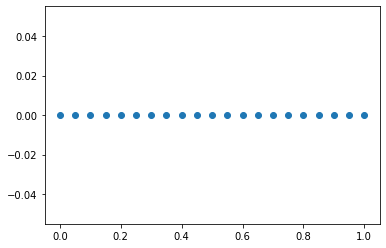

In [26]:
xs = np.arange(0, 1.05, 0.05)
ys = check_alpha1_err(1)
plt.scatter(xs, ys)

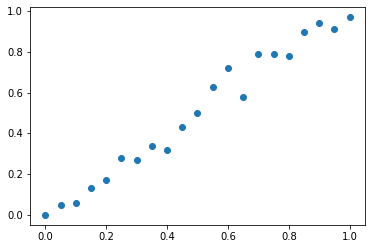

In [27]:
xs = np.arange(0, 1.05, 0.05)
ys = check_alpha1_err(2)
plt.scatter(xs, ys)

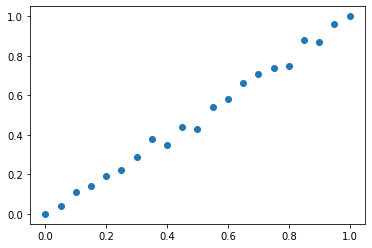

In [28]:
xs = np.arange(0, 1.05, 0.05)
ys = check_alpha1_err(5)
plt.scatter(xs, ys)

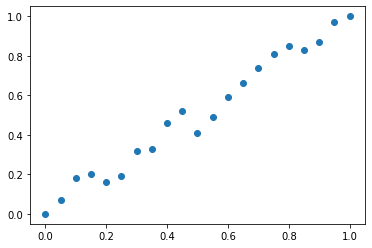

In [29]:
xs = np.arange(0, 1.05, 0.05)
ys = check_alpha1_err(10)
plt.scatter(xs, ys)

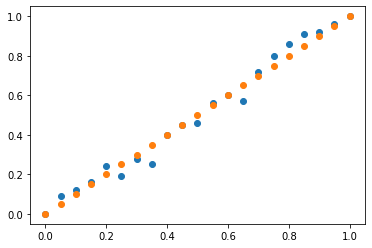

In [30]:
xs = np.arange(0, 1.05, 0.05)
ys = check_alpha1_err(20)
plt.scatter(xs, ys)
plt.scatter(xs, xs)

I already did it in homework 5, it looks like same task twice

After asking this on lecture I will try to move the partitions

In [56]:
def check_alpha1_err2(n_df):
    borders = []
    if (n_df == 1):
        borders = []
    elif (n_df == 2):
        borders = [0]
    else:
        borders = np.arange(-4, 0, 2 / (n_df - 2)).tolist() + [2]
    borders = ["-inf"] + borders + ["inf"]
    return chi_sq_H0_Pvalue(100, borders, n_df)

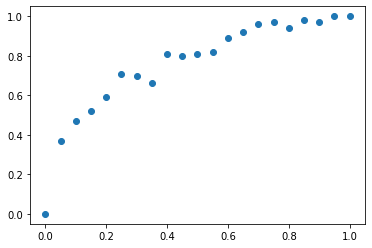

In [60]:
xs = np.arange(0, 1.05, 0.05)
ys = check_alpha1_err2(20)
plt.scatter(xs, ys)

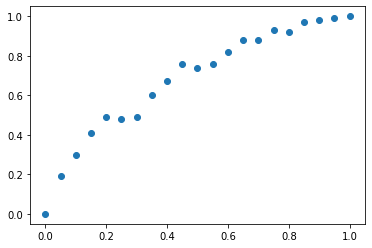

In [61]:
xs = np.arange(0, 1.05, 0.05)
ys = check_alpha1_err2(10)
plt.scatter(xs, ys)

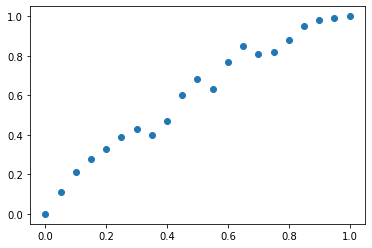

In [62]:
xs = np.arange(0, 1.05, 0.05)
ys = check_alpha1_err2(5)
plt.scatter(xs, ys)

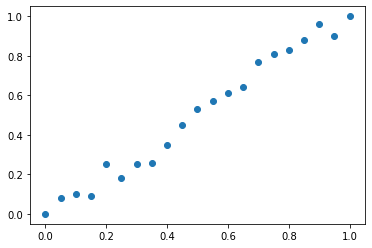

In [63]:
xs = np.arange(0, 1.05, 0.05)
ys = check_alpha1_err2(3)
plt.scatter(xs, ys)

Now I understand that it becomes more radical if you choose wrong partitions!

## Task 3

The hospital has collected data of ambulance calls for the past 480 hours.
It turned out that a total of 960 people asked for the medical assistance
during this period. Namely, within 60 hours no one asked for the medical
assistance, within 140 hours - one person, within 125 hours - 2 people, and
for the remaining 155 hours, ≥ 3 people asked for the medical assistance.
Test the hypothesis that the collected data has a Poisson distribution.

We had MLE for Poisson earlier, so I will use that function from the 2nd lecture, slides 10-11. It says that for Poisson distribution MLE is a sample mean. In our case it is 2.

In [31]:
960/480

2.0

$$ P(\xi = k) = \frac{\lambda^k}{k!} e^{-\lambda}, \\
E(\xi) = \lambda, \\
MLE(\lambda) = mean = 2$$

For a discrete distribution I'll use the Xi squared test

In [32]:
def p(k):
    if k == 3:
        return 1 - (p(0) + p(1) + p(2))
    return 2**k / math.factorial(k) * np.exp(-2)

p(3)

0.3233235838169365

In [75]:
def discr_chi_sq_part(k, Ok):
    pk = p(k) * 480
    return (Ok - pk)**2 / pk

In [76]:
def discr_chi_sq():
    t = 0
    t += discr_chi_sq_part(0, 60)
    t += discr_chi_sq_part(1, 140)
    t += discr_chi_sq_part(2, 125)
    t += discr_chi_sq_part(3, 155)
    return t

discr_chi_sq()

1.347326625773797

In [90]:
alpha = 0.05

stats.chi2.ppf(alpha/2, 2)

0.05063561596857975

In [91]:
stats.chi2.ppf(1 - alpha/2, 2)

7.377758908227871

I got 2 degrees of freedom so criterion should be more radical because I used MLE for $\lambda$ estimation. It appears we can't reject null hypothesis event with the strictened criterion.

## Task 4

The main point to think about is that we have the single sided alternative.

In [37]:
n1 = 25
mean_x = 3.6

n2 = 27
mean_y = 3.8

sig1_sq = 0.36
sig2_sq = 0.32

alpha = 0.05

X ~ N(a1, sig1_sq), Y ~ N(a2, sig2_sq), test that a1 < a2

Welch t-test

In [38]:
# for y == x
criterion = (mean_y - mean_x) / np.sqrt(sig1_sq/n2 + sig2_sq/n1)

criterion

1.2371791482634822

The bigger criterion gets the better second battery against 1st one is.

It actually means that We might want to use single sided critical region.

In [89]:
stats.norm.ppf(0.95)

1.6448536269514722

Criterion for $H_0 : y == x$ is outside the confidence region for $\alpha = 0.05$ so we can't reject the $h_0$

So we can't say that the second battery is better than the first one